(regression)=
# Linear regression



The goal in this chapter is to introduce **_linear regression_**, the standard tool that statisticians rely on when analysing the relationship between interval scale predictors and interval scale outcomes. Stripped to its bare essentials, linear regression models are basically a slightly fancier version of the [Pearson correlation](correl) though as we'll see, regression models are much more powerful tools.

Since the basic ideas in regression are closely tied to correlation, we'll return to the `parenthood.csv` file that we were using to illustrate how correlations work. Recall that, in this data set, we were trying to find out why Dan is so very grumpy all the time, and our working hypothesis was that I'm not getting enough sleep. 

In [1]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


We drew some scatterplots to help us examine the relationship between the amount of sleep I get, and my grumpiness the following day. 

<AxesSubplot:title={'center':'Grumpiness and sleep'}, xlabel='My sleep (hours)', ylabel='My grumpiness (0-100)'>

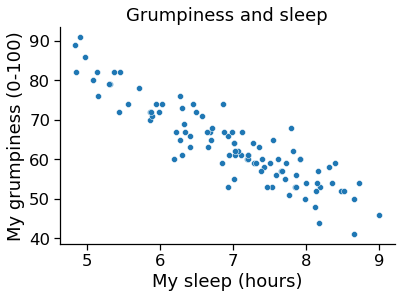

In [2]:
from myst_nb import glue
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

glue("sleepycorrelation_fig", ax, display=False)

 ```{glue:figure} sleepycorrelation-fig
:figwidth: 600px
:name: fig-sleepycorrelation

Scatterplot showing grumpiness as a function of hours slept.

```


The actual scatterplot that we draw is the one shown in {numref}`fig-sleepycorrelation`, and as we saw previously this corresponds to a correlation of $r=-.90$, but what we find ourselves secretly imagining is something that looks closer to the left panel in {numref}`fig-sleep_regressions_1`. That is, we mentally draw a straight line through the middle of the data. In statistics, this line that we're drawing is called a **_regression line_**. Notice that -- since we're not idiots -- the regression line goes through the middle of the data. We don't find ourselves imagining anything like the rather silly plot shown in the right panel in {numref}`fig-sleep_regressions_1`. 

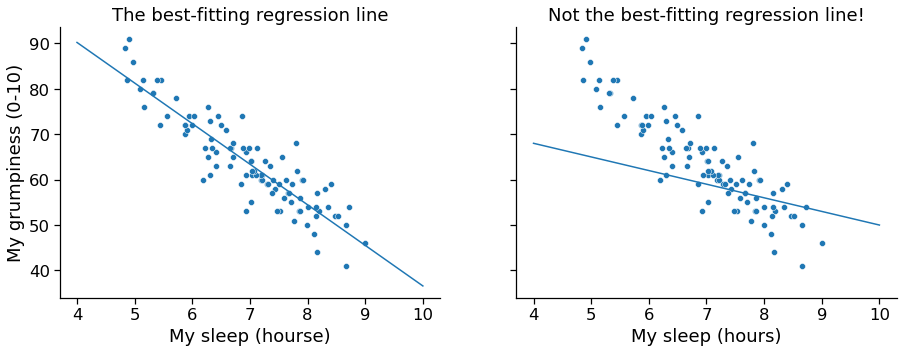

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# find the regression coefficients to allow manually plotting the line
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

x = np.linspace(4,10)


sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hourse)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x,-3*x+80)

sns.despine()

#glue("sleep_regressions_1-fig", fig, display=False)

 ```{glue:figure} sleep_regressions_1-fig
:figwidth: 600px
:name: fig-sleep_regressions_1

The panel to the left shows the sleep-grumpiness scatterplot from {numref}`fig-sleepycorrelation` with the best fitting regression line drawn over the top. Not surprisingly, the line goes through the middle of the data. In contrast, the panel to the right shows the same data, but with a very poor choice of regression line drawn over the top.

```


This is not highly surprising: the line that I've drawn in Figure \@ref(fig:regression1b) doesn't "fit" the data very well, so it doesn't make a lot of sense to propose it as a way of summarising the data, right? This is a very simple observation to make, but it turns out to be very powerful when we start trying to wrap just a little bit of maths around it. To do so, let's start with a refresher of some high school maths. The formula for a straight line is usually written like this:

$$
y = mx + c
$$ 




Or, at least, that's what it was when I went to high school all those years ago. The two *variables* are $x$ and $y$, and we have two *coefficients*, $m$ and $c$. The coefficient $m$ represents the *slope* of the line, and the coefficient $c$ represents the *$y$-intercept* of the line. Digging further back into our decaying memories of high school (sorry, for some of us high school was a long time ago), we remember that the intercept is interpreted as "the value of $y$ that you get when $x=0$". Similarly, a slope of $m$ means that if you increase the $x$-value by 1 unit, then the $y$-value goes up by $m$ units; a negative slope means that the $y$-value would go down rather than up. Ah yes, it's all coming back to me now. 

Now that we've remembered that, it should come as no surprise to discover that we use the exact same formula to describe a regression line. If $Y$ is the outcome variable (the DV) and $X$ is the predictor variable (the IV), then the formula that describes our regression is written like this:

$$
\hat{Y_i} = b_1 X_i + b_0
$$

Hm. Looks like the same formula, but there's some extra frilly bits in this version. Let's make sure we understand them. Firstly, notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. This is because we want to remember that we're dealing with actual data. In this equation, $X_i$ is the value of predictor variable for the $i$th observation (i.e., the number of hours of sleep that I got on day $i$ of my little study), and $Y_i$ is the corresponding value of the outcome variable (i.e., my grumpiness on that day). And although I haven't said so explicitly in the equation, what we're assuming is that this formula works for all observations in the data set (i.e., for all $i$). Secondly, notice that I wrote $\hat{Y}_i$ and not $Y_i$. This is because we want to make the distinction between the *actual data* $Y_i$, and the *estimate* $\hat{Y}_i$ (i.e., the prediction that our regression line is making). Thirdly, I changed the letters used to describe the coefficients from $m$ and $c$ to $b_1$ and $b_0$. That's just the way that statisticians like to refer to the coefficients in a regression model. I've no idea why they chose $b$, but that's what they did. In any case $b_0$ always refers to the intercept term, and $b_1$ refers to the slope.


Excellent, excellent. Next, I can't help but notice that -- regardless of whether we're talking about the good regression line or the bad one -- the data don't fall perfectly on the line. Or, to say it another way, the data $Y_i$ are not identical to the predictions of the regression model $\hat{Y_i}$. Since statisticians love to attach letters, names and numbers to everything, let's refer to the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.[^noteepsilon] Written using mathematics, the residuals are defined as:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

which in turn means that we can write down the complete linear regression model as:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$

[^noteepsilon]: The $\epsilon$ symbol is the Greek letter epsilon. It's traditional to use $\epsilon_i$ or $e_i$ to denote a residual.

(regressionestimation)=
## Estimating a linear regression model


Okay, now let's redraw our pictures, but this time I'll add some lines to show the size of the residual for all observations. When the regression line is good, our residuals (the lengths of the solid black lines) all look pretty small, as shown in Figure \@ref(fig:regression3a), but when the regression line is a bad one, the residuals are a lot larger, as you can see from looking at Figure \@ref(fig:regression3b). Hm. Maybe what we "want" in a regression model is *small* residuals. Yes, that does seem to make sense. In fact, I think I'll go so far as to say that the "best fitting" regression line is the one that has the smallest residuals. Or, better yet, since statisticians seem to like to take squares of everything why not say that ...

> The estimated regression coefficients, $\hat{b}_0$ and $\hat{b}_1$ are those that minimise the sum of the squared residuals, which we could either write as $\sum_i (Y_i - \hat{Y}_i)^2$ or as $\sum_i {\epsilon_i}^2$.

Yes, yes that sounds even better. And since I've indented it like that, it probably means that this is the right answer. And since this is the right answer, it's probably worth making a note of the fact that our regression coefficients are *estimates* (we're trying to guess the parameters that describe a population!), which is why I've added the little hats, so that we get $\hat{b}_0$ and $\hat{b}_1$ rather than $b_0$ and $b_1$. Finally, I should also note that -- since there's actually more than one way to estimate a regression model -- the more technical name for this estimation process is **_ordinary least squares (OLS) regression_**.  

At this point, we now have a concrete definition for what counts as our "best" choice of regression coefficients, $\hat{b}_0$ and $\hat{b}_1$. The natural question to ask next is,  if our optimal regression coefficients are those that minimise the sum squared residuals, how do we *find* these wonderful numbers? The actual answer to this question is complicated, and it doesn't help you understand the logic of regression.^[Or at least, I'm assuming that it doesn't help most people. But on the off chance that someone reading this is a proper kung fu master of linear algebra (and to be fair, I always have a few of these people in my intro stats class), it *will* help *you* to know that the solution to the estimation problem turns out to be $\hat{b} = (X^TX)^{-1} X^T y$, where $\hat{b}$ is a vector containing the estimated regression coefficients,  $X$ is the "design matrix" that contains the predictor variables (plus an additional column containing all ones; strictly $X$ is a matrix of the regressors, but I haven't discussed the distinction yet), and $y$ is a vector containing the outcome variable. For everyone else, this isn't exactly helpful, and can be downright scary. However, since quite a few things in linear regression can be written in linear algebra terms, you'll see a bunch of footnotes like this one in this chapter. If you can follow the maths in them, great. If not, ignore it.]  As a result, this time I'm going to let you off the hook. Instead of showing you how to do it the long and tedious way first, and then "revealing" the wonderful shortcut that R provides you with, let's cut straight to the chase... and use the `lm()` function (short for "linear model") to do all the heavy lifting. 

NameError: name 'y' is not defined

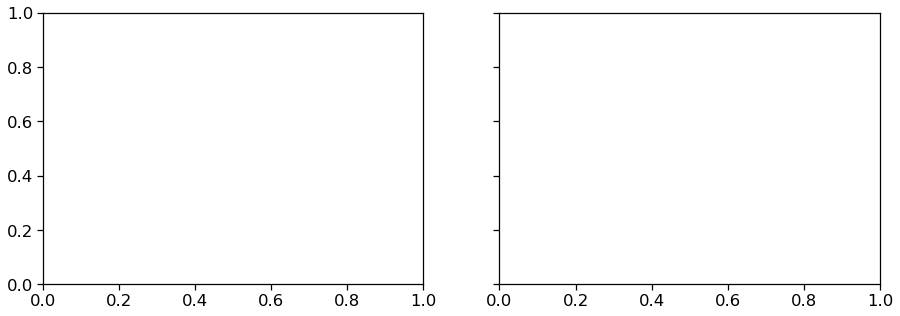

In [4]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = df['dan_sleep']
yData = numpy.array(df['dan_grump'])

# linear model
def func(x, a, b):
    return a * x + b


initialParameters = numpy.array([1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)



modelPredictions = func(xData, *fittedParameters) 



data = pd.DataFrame({'x': xData,
                     'y': xData})

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(data = data, x = x, y = y, ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line!")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")

# create data for the fitted equation plot
xModel = numpy.linspace(min(xData), max(xData))
yModel = func(xModel, *fittedParameters)

# now the model as a line plot
axes[0].plot(xModel, yModel)

# now add individual line for each point
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    axes[0].plot(lineXdata, lineYdata)

    
#####

badParameters = np.array([-3, 80])
badPredictions = func(xData, *badParameters) 

bad_xModel = numpy.linspace(min(xData), max(xData))
bad_yModel = func(bad_xModel, *badParameters)

sns.scatterplot(data = data, x = x, y = y, ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(bad_xModel, bad_yModel)  

for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) 
    lineYdata = (yData[i], badPredictions[i]) 
    axes[1].plot(lineXdata, lineYdata)
  
    
sns.despine()